<center><h1 style="font-size:40px;">Exercise I:<br> Backpropagation
</h1></center>

---

# Introduction

Welcome to the second part of the first lab for Deep Learning!

In this lab we will scratch the surface of pytorch and deep learning. Pytorch is a powerful tool for data scientists to train neural networks. Pytorch has a lots of features which can be used too train and create custom dataloaders, models and trainers in order to solve most problems related to neural networks.

For this lab, all tasks include **TODO's** these are expected to be done before the deadline. The labs also include **Question** which should be answered and included in the *Report.ipynb*. Some sections does not contain any **TODO's** but is good to understand them. 

There is a file called config.py. This file contains most of the settings that is used during the lab. We wont use every setting at all time but the config help us to keep organised.

---

# Lab 1

The following code allows us to edit imported files without restarting the kernel for the notebook

In [23]:
%load_ext autoreload
%autoreload 2
# Hacky solution to access the global utils package
import sys,os
sys.path.append(os.path.dirname(os.path.realpath('')))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# local modules
from config import LabConfig
from sklearn.datasets import load_digits
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Torch packages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

ModuleNotFoundError: No module named 'utils.globals'

## Load config

In [11]:
cfg = LabConfig()

NameError: name 'LabConfig' is not defined

## Define neural network

In order to create a neural network model we need to implement the following class which inherits nn.Module. 

The first example is a single perceptron.

If we assume that the trainer uses CrossEntropyLoss from pytorch we do not need to define an activation function before the output since CrossEntropyLoss combines nn.LogSoftmax() and nn.NLLLoss() according to the pytorch documentation.

The input_size for this lab is the image size (cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT) and the output size are the number of classes to predict.

In [6]:
# Example 1
class Perceptron(nn.Module):
    def __init__(self,  input_size, output_size):
        super(Perceptron, self).__init__()
        # nn.Linear will create a fully connected layer 
        self.fc = nn.Linear(input_size,output_size)
        
    def forward(self, x):
        # we need to flatten the input in a shape that the network would accept. 
        x = x.view(x.size(0), -1)
        output = self.fc(x)
        return output

An architecture with 1 or more hidden layers are known as a deep/multilayer feedforward model or multilayer perceptron model (MLP). 

## Task 1

**TODO:** Implement the MLP architecture to have 1 or more hidden layers. Number of hidden layer will be defined by n_hidden_layers parameter. 

In [12]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size,hidden_size, n_hidden_layers):
        super(MLP, self).__init__()
        # TODO
        self.input = nn.Linear(input_size, 60)
        self.hidden = [nn.Linear(hidden_size, hidden_size) for _ in range(n_hidden_layers)]
        self.output = nn.Linear(60, output_size)
 
    def forward(self, x):
        # TODO
        x = x.view(x.size(0), -1)
        x = self.input(x)
        for layer in self.hidden:
            x = layer(x)
        return self.output(x)

NameError: name 'nn' is not defined

## Load dataset
To load the data we will use ```torchvision``` library. It provides standard datasets for example ```MNIST```, ```CIFAR10``` etc. ```torchvision``` library also provides ways to augment and tensorize numpy data. 

In [8]:
class ToTensor(torchvision.transforms.ToTensor):

    def __call__(self, pic):
        return super().__call__(np.array(pic, copy=True))

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, ), (0.5, ))])

trainset = torchvision.datasets.MNIST(root='../data', 
                                        train=True,
                                        download=True,
                                        transform=transform)

testset = torchvision.datasets.MNIST(root='../data', 
                                        train=False, 
                                        download=True, 
                                        transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=2)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=100,
                                         shuffle=False,
                                         num_workers=2)

## Plot a batch from dataset

We visualize the data using ```matplotlib``` library. 

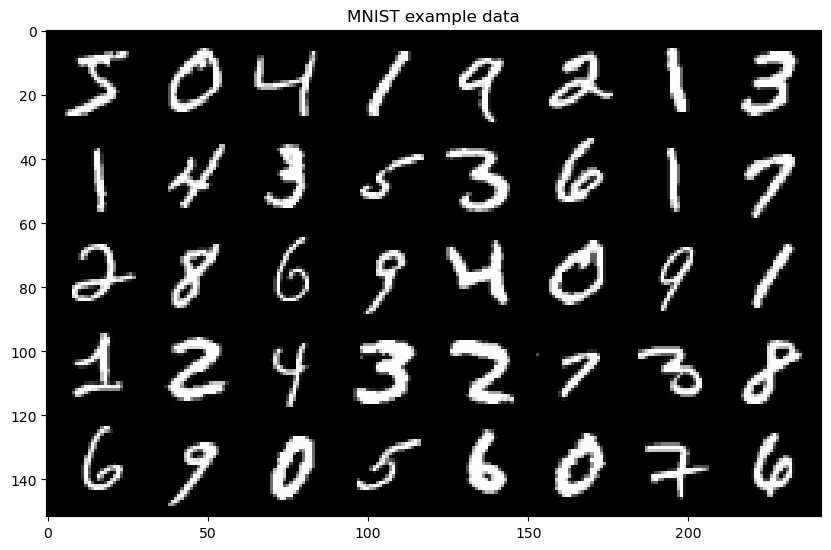

In [9]:
sample_index = 40
plt.figure(figsize=(10,10))
plt.imshow(torchvision.utils.make_grid(trainset.data[:sample_index].unsqueeze(1).float(), normalize=True).permute(1,2,0),cmap=plt.cm.gray_r,interpolation='nearest')
plt.title("MNIST example data");

## Learning framework

In this section we will learn to predict with the help of our network. The approach consist of two parts; a training and a validation step.

Training consist of 4 stages:
1. Compute model's predictions (forward pass)
2. Compute the loss, using predictions, labels and a appropriate loss function
3. Compute the gradients for every parameter (backpropagation) 
4. Update the parameters

Validation consist of 2 stages:
1. Compute model's predictions (forward pass)
2. Compute the loss, using predictions, labels and a appropriate loss function

## Task 2

**TODO:** Implement the steps to run the trainer below

## Trainer

In [29]:
def trainer(model, epochs):
    loss_metric = []
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader, 0):
            # TODO: zero parameter gradients
            optimizer.zero_grad()
            # TODO: Feed forward
            outputs = model(inputs)
            # TODO: Calculate loss
            loss = criterion(outputs, labels)
            # TODO: Backpropagate
            loss.backward()
            # TODO: Optimizer step
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            
            print(f'[{epoch + 1}, {i+1:4}/{len(trainloader)}] loss: {loss.item():.4}', end='\r')
        loss_metric.append(loss.item()/len(trainloader))
    return {'loss':loss_metric}

## Configs
For this lab we dont have a lot of configs and we keep it simple. We can define our model, number of hidden nodes, optimizer and number of epochs to run.


## Task 3
**TODO:** 
1. Train the network with the Perceptron model.
2. Train the MLP model and see if it performs better than the Perceptron.
3. Extend Feedforward with additional hidden nodes until we see that the loss is going down.
4. In this task increase the depht (more layers) of the Feedforward network instead of the size of the hidden layer.
5. Test different hyperparameters with the MLP model. How did the result change? Is the result better or worse, why? 


**Questions:** 
1. How did the Feedforward network perform? 
2. How did the modified Feedforward network perform? 
3. Can we reduce number of nodes with an increased number of layers or vise verse, any changes?

**Bonus Question**

4. What will happen if we replace the nn.CrossEntropyLoss with nn.NLLLoss without changing anything else? What should be done to get the same output from NLLLoss and CrossEntropyLoss? 


In [ ]:
HIDDEN_NODES = 2
model = Perceptron(cfg.IMAGE_WIDTH*cfg.IMAGE_HEIGHT, cfg.NUM_CLASS)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epochs = 5

In [ ]:
# Run the model
metrics = trainer(model, epochs)

Lets check the loss over each epoch.

In [ ]:
plt.plot(metrics['loss'])
plt.title("Training loss")

## Testing

Lets predict some data to see the performance of a few samples

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = model(images)
_, predicted = torch.max(outputs, 1)

In [ ]:
n_test = 10
df_result = pd.DataFrame({
    'Ground Truth': labels[:n_test],
    'Predicted label': predicted[:n_test]})
display(df_result.T)
plt.imshow(torchvision.utils.make_grid(images[:n_test, :, :, :], nrow=n_test).permute(1,2,0))

# Bonus Task 

Implement CrossEntropyLoss using torch.nn.NLLLoss 